# Image Blending and Pasting

In [64]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

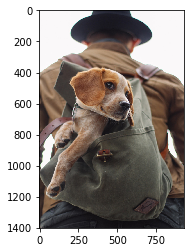

In [65]:
# Dog Image
img1 = cv.imread('../assets/dog_backpack.png')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
plt.imshow(img1)


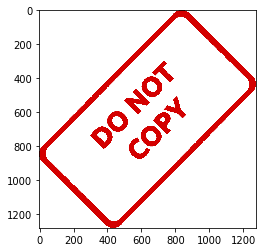

In [66]:
# Watermark
img2 = cv.imread('../assets/watermark_no_copy.png')
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
plt.imshow(img2)


__Obs:__ The images are note the same size!!

In [67]:
img1.shape

(1401, 934, 3)

In [68]:
img2.shape

(1280, 1277, 3)

## Blending Images of the Same Size 

In [69]:
resized_img1 = cv.resize(img1, (1200, 1200))
resized_img2 = cv.resize(img2, (1200, 1200))

We distorted the images to get the same size

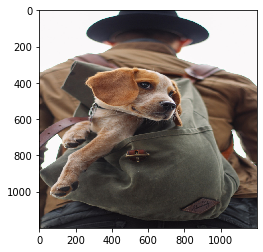

In [70]:
plt.imshow(resized_img1)

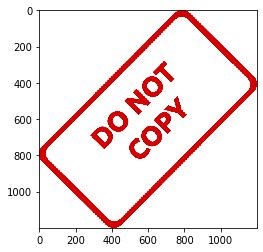

In [71]:
plt.imshow(resized_img2)

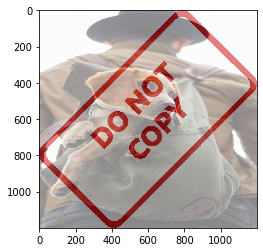

In [72]:
blended_img = cv.addWeighted(src1=resized_img1, alpha=0.5,src2=resized_img2, beta=0.5, gamma=0)
plt.imshow(blended_img)

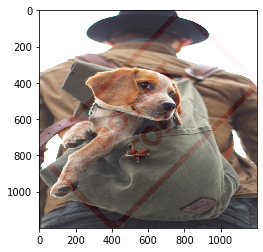

In [73]:
blended_img = cv.addWeighted(src1=resized_img1, alpha=1,src2=resized_img2, beta=0.1, gamma=0)
plt.imshow(blended_img)

__Obs:__
Uma observação que pode ser feita em relação a função dos parametros **alpha, beta e gamma** é:
- **alpha** é a transparencia da img1;
- **beta** é a transparencia da img2;
- **gamma** é a saturação do total. 

## "Blending" Images of Different Size 

### 1. Overlaying by Numpy reassigment (NO BLENDING)

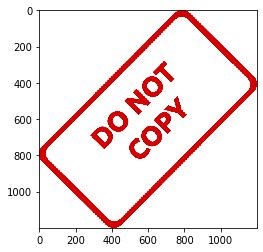

In [74]:
large_img = np.copy(img1)
small_img = cv.resize(img2, (600,600))
plt.imshow(resized_img2)

In [75]:
# Defining the small image position (x,y)
start = (0,0)
end = (start[0] + small_img.shape[0], start[1] + small_img.shape[1])

start, end

((0, 0), (600, 600))

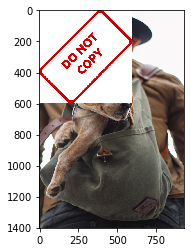

In [76]:
large_img[start[0]:end[0], start[1]:end[1]] = small_img
plt.imshow(large_img)

### 2. Blending different sizes with masks

In [77]:
large_img = np.copy(img1) 
small_img = cv.resize(img2, (600,600))

In [78]:
# Defining the small image position (x,y)
start = (large_img.shape[0] - small_img.shape[0], large_img.shape[1] - small_img.shape[1])
end = (start[0] + small_img.shape[0], start[1] + small_img.shape[1])

start, end, large_img.shape

((801, 334), (1401, 934), (1401, 934, 3))

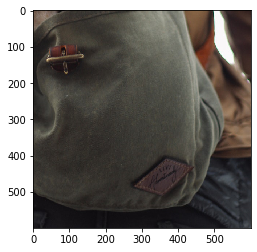

In [79]:
# Defening the region of interest (ROI)
roi = large_img[start[0]:end[0], start[1]:end[1]]
plt.imshow(roi)

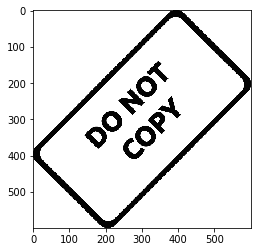

In [80]:
# Creating the mask
gray_small_img = cv.cvtColor(small_img, cv.COLOR_RGB2GRAY)
plt.imshow(gray_small_img, cmap="gray")

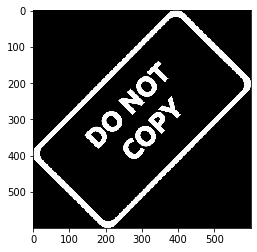

In [81]:
mask = cv.bitwise_not(gray_small_img) #invert_colors
plt.imshow(mask, cmap="gray")

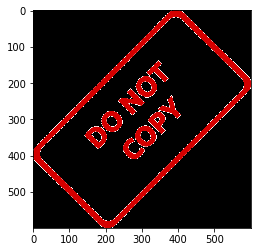

In [82]:
foreground = cv.bitwise_or(small_img, small_img, mask=mask)
plt.imshow(foreground)

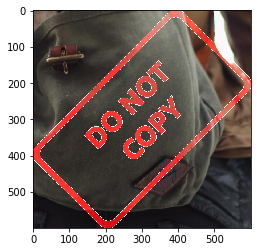

In [83]:
masked_roi = cv.bitwise_or(roi, foreground)
plt.imshow(masked_roi)

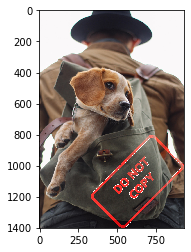

In [84]:
large_img[start[0]:end[0], start[1]:end[1]] = masked_roi
plt.imshow(large_img)
